In [160]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import re 
import string 
import nltk 
import warnings
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud
from sklearn.metrics import f1_score
warnings.filterwarnings('ignore')


In [100]:
data_train = pd.read_csv("C:/Data science#projects/Twitter sentiment analysis/train.csv")

In [97]:
train_oringin= data.copy()

In [95]:
data_test= pd.read_csv("C:/Data science#projects/Twitter sentiment analysis/test.csv")

In [98]:
test_origin= data_test.copy

In [101]:
data_train.shape 

(31962, 3)

In [102]:
data_test.shape

(17197, 2)

In [103]:
data_train.columns 

Index(['id', 'label', 'tweet'], dtype='object')

In [104]:
data= data_train.append(data_test,ignore_index=True,sort=True)

In [109]:
data.head()

,id,label,tweet
0,1,0.0,@user when a father is dysfunctional and is s...
1,2,0.0,@user @user thanks for #lyft credit i can't us...
2,3,0.0,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...
4,5,0.0,factsguide: society now #motivation


In [110]:
data.shape

(49159, 3)

In [111]:
data['tweet']

0         @user when a father is dysfunctional and is s...
1        @user @user thanks for #lyft credit i can't us...
2                                      bihday your majesty
3        #model   i love u take with u all the time in ...
4                   factsguide: society now    #motivation
                               ...                        
49154    thought factory: left-right polarisation! #tru...
49155    feeling like a mermaid ð #hairflip #neverre...
49156    #hillary #campaigned today in #ohio((omg)) &am...
49157    happy, at work conference: right mindset leads...
49158    my   song "so glad" free download!  #shoegaze ...
Name: tweet, Length: 49159, dtype: object

In [112]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49159 entries, 0 to 49158
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      49159 non-null  int64  
 1   label   31962 non-null  float64
 2   tweet   49159 non-null  object 
dtypes: float64(1), int64(1), object(1)
memory usage: 1.1+ MB


# Preprocessing of the Data 

In [113]:
def remove_pattern(input_text, pattern):
    r= re.findall(pattern, input_text)
    for i in r:
        input_text= re.sub(i,"",input_text)
    return input_text
        

In [114]:
remove_pattern(data['tweet'][0], "@[\w]*")

'  when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.   #run'

In [115]:
data['clean_tweet']= np.vectorize(remove_pattern)(data['tweet'], "@[\w]*")

In [116]:
data['clean_tweet']

0          when a father is dysfunctional and is so sel...
1          thanks for #lyft credit i can't use cause th...
2                                      bihday your majesty
3        #model   i love u take with u all the time in ...
4                   factsguide: society now    #motivation
                               ...                        
49154    thought factory: left-right polarisation! #tru...
49155    feeling like a mermaid ð #hairflip #neverre...
49156    #hillary #campaigned today in #ohio((omg)) &am...
49157    happy, at work conference: right mindset leads...
49158    my   song "so glad" free download!  #shoegaze ...
Name: clean_tweet, Length: 49159, dtype: object

In [117]:
# remove special caracters, and punctuetion 

In [118]:
data['clean_tweet']= data['clean_tweet'].str.replace("[^a-zA-Z#]"," ")

In [119]:
data['clean_tweet']

0          when a father is dysfunctional and is so sel...
1          thanks for #lyft credit i can t use cause th...
2                                      bihday your majesty
3        #model   i love u take with u all the time in ...
4                   factsguide  society now    #motivation
                               ...                        
49154    thought factory  left right polarisation  #tru...
49155    feeling like a mermaid      #hairflip #neverre...
49156    #hillary #campaigned today in #ohio  omg    am...
49157    happy  at work conference  right mindset leads...
49158    my   song  so glad  free download   #shoegaze ...
Name: clean_tweet, Length: 49159, dtype: object

In [120]:
tokenize_tweet= data['clean_tweet'].apply(lambda x: x.split())
tokenize_tweet.head()

0    [when, a, father, is, dysfunctional, and, is, ...
1    [thanks, for, #lyft, credit, i, can, t, use, c...
2                              [bihday, your, majesty]
3    [#model, i, love, u, take, with, u, all, the, ...
4              [factsguide, society, now, #motivation]
Name: clean_tweet, dtype: object

In [121]:
from nltk.stem.porter import PorterStemmer

In [122]:
stemmer = PorterStemmer()
tokenize_tweet= tokenize_tweet.apply(lambda sentence: [stemmer.stem(word) for word in sentence] ) 
tokenize_tweet.head()

0    [when, a, father, is, dysfunct, and, is, so, s...
1    [thank, for, #lyft, credit, i, can, t, use, ca...
2                              [bihday, your, majesti]
3    [#model, i, love, u, take, with, u, all, the, ...
4                    [factsguid, societi, now, #motiv]
Name: clean_tweet, dtype: object

In [123]:
for i in range(len(tokenize_tweet)):
    tokenize_tweet[i]= " ".join(tokenize_tweet[i])
    
data['clean_tweet'] =tokenize_tweet
data.head()


,id,label,tweet,clean_tweet
0,1,0.0,@user when a father is dysfunctional and is s...,when a father is dysfunct and is so selfish he...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thank for #lyft credit i can t use caus they d...
2,3,0.0,bihday your majesty,bihday your majesti
3,4,0.0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ur
4,5,0.0,factsguide: society now #motivation,factsguid societi now #motiv


In [124]:
data['label'].value_counts()

0.0    29720
1.0     2242
Name: label, dtype: int64

In [125]:
all_words= " ".join([sentence for sentence in data['clean_tweet']])

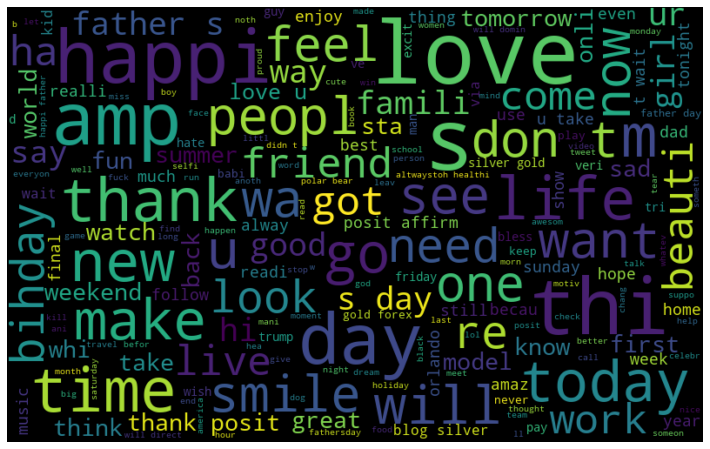

In [126]:
# frequences's words
wordcloud= WordCloud(width=800, height= 500, random_state= 42, max_font_size= 100).generate(all_words)
plt.figure(figsize= (15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

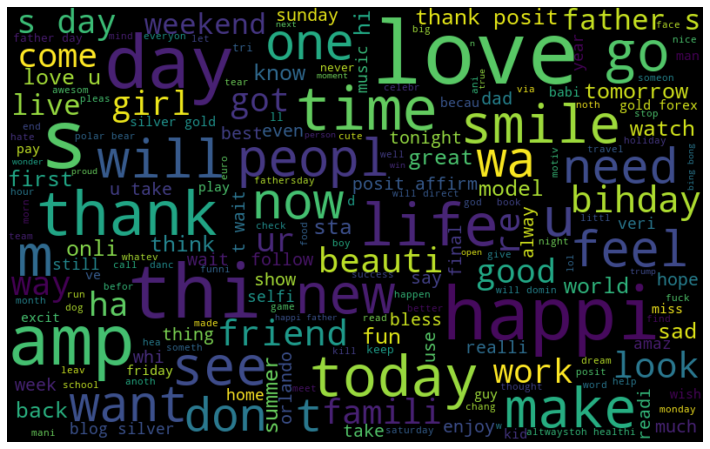

In [127]:
#frequences of positive words
# frequences's words
all_words= " ".join([sentence for sentence in data['clean_tweet'][data['label']==0]])
wordcloud= WordCloud(width=800, height= 500, random_state= 42, max_font_size= 100).generate(all_words)
plt.figure(figsize= (15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


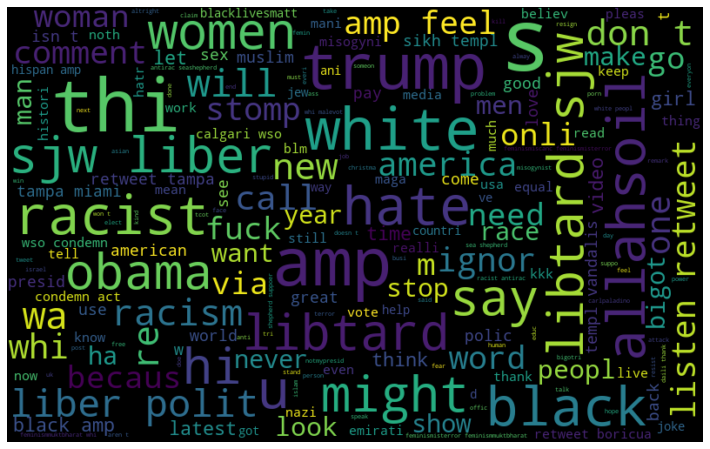

In [128]:
#frequences of negative words
# frequences's words
all_words= " ".join([sentence for sentence in data['clean_tweet'][data['label']==1]])
wordcloud= WordCloud(width=800, height= 500, random_state= 42, max_font_size= 100).generate(all_words)
plt.figure(figsize= (15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [129]:
# extract the hachrag
def hashtag_extract(tweets):
    hashtag=[]
    for tweet in tweets:
        ht= re.findall(r"#(\w+)", tweet)
        hashtag.append(ht)
    return hashtag

In [139]:
ht_positive=hashtag_extract(data['clean_tweet'][data['label']==0]) 

In [140]:
ht_negative=hashtag_extract(data['clean_tweet'][data['label']==1]) 

In [141]:
ht_negative

[['cnn', 'michigan', 'tcot'],
 ['australia',
  'opkillingbay',
  'seashepherd',
  'helpcovedolphin',
  'thecov',
  'helpcovedolphin'],
 [],
 [],
 ['neverump', 'xenophobia'],
 ['love', 'peac'],
 [],
 ['race', 'ident', 'med'],
 ['altright', 'whitesupremaci'],
 ['linguist', 'race', 'power', 'raciolinguist'],
 ['brexit'],
 ['peopl', 'trump', 'republican'],
 ['michelleobama'],
 ['knick', 'golf'],
 ['jewishsupremacist'],
 ['libtard', 'sjw', 'liber', 'polit'],
 ['trash', 'hate'],
 [],
 [],
 ['stereotyp', 'prejudic', 'hope', 'hate', 'conflict'],
 ['pol', 'bluelivesmatt', 'draintheswamp', 'ferguson'],
 [],
 ['antisemit', 'hocoschool', 'columbiamd', 'hocomd'],
 ['nazi', 'hatr', 'bigotri'],
 ['libtard', 'sjw', 'liber', 'polit'],
 ['p', 'p', 'fyi', 'tcot'],
 ['topoli'],
 ['blacklivesmatt'],
 ['ushistori', 'eugen'],
 ['biher', 'bigotri', 'altright', 'potu', 'theresist'],
 ['crime', 'offic'],
 [],
 ['black', 'retweet', 'tampa', 'miami'],
 ['allahsoil'],
 [],
 ['prais', 'cleveland', 'rnc', 'white', '

In [142]:
t=[]
for i in range(len(ht_negative)):
    t=t+ht_negative[i]
    

In [143]:
ht_negative=t

In [144]:
ht_negative

['cnn',
 'michigan',
 'tcot',
 'australia',
 'opkillingbay',
 'seashepherd',
 'helpcovedolphin',
 'thecov',
 'helpcovedolphin',
 'neverump',
 'xenophobia',
 'love',
 'peac',
 'race',
 'ident',
 'med',
 'altright',
 'whitesupremaci',
 'linguist',
 'race',
 'power',
 'raciolinguist',
 'brexit',
 'peopl',
 'trump',
 'republican',
 'michelleobama',
 'knick',
 'golf',
 'jewishsupremacist',
 'libtard',
 'sjw',
 'liber',
 'polit',
 'trash',
 'hate',
 'stereotyp',
 'prejudic',
 'hope',
 'hate',
 'conflict',
 'pol',
 'bluelivesmatt',
 'draintheswamp',
 'ferguson',
 'antisemit',
 'hocoschool',
 'columbiamd',
 'hocomd',
 'nazi',
 'hatr',
 'bigotri',
 'libtard',
 'sjw',
 'liber',
 'polit',
 'p',
 'p',
 'fyi',
 'tcot',
 'topoli',
 'blacklivesmatt',
 'ushistori',
 'eugen',
 'biher',
 'bigotri',
 'altright',
 'potu',
 'theresist',
 'crime',
 'offic',
 'black',
 'retweet',
 'tampa',
 'miami',
 'allahsoil',
 'prais',
 'cleveland',
 'rnc',
 'white',
 'tamirric',
 'rip',
 'bigot',
 'blacklivesmatt',
 'fe

In [146]:
t=[]
for i in range(len(ht_positive)):
    t=t+ht_positive[i]
    

In [148]:
ht_positive=t
ht_positive

['run',
 'lyft',
 'disapoint',
 'getthank',
 'model',
 'motiv',
 'allshowandnogo',
 'school',
 'exam',
 'hate',
 'imagin',
 'actorslif',
 'revolutionschool',
 'girl',
 'allin',
 'cav',
 'champion',
 'cleveland',
 'clevelandcavali',
 'gr',
 'ireland',
 'blog',
 'silver',
 'gold',
 'forex',
 'orlando',
 'standwithorlando',
 'pulseshoot',
 'orlandoshoot',
 'biggerproblem',
 'selfish',
 'heabreak',
 'valu',
 'love',
 'gettingf',
 'got',
 'junior',
 'yugyoem',
 'omg',
 'thank',
 'posit',
 'friday',
 'cooki',
 'euro',
 'badday',
 'coneofsham',
 'cat',
 'piss',
 'funni',
 'laugh',
 'wine',
 'weekend',
 'tgif',
 'ff',
 'gamedev',
 'indiedev',
 'indiegamedev',
 'squad',
 'upsideofflorida',
 'shopalyssa',
 'love',
 'smile',
 'media',
 'pressconfer',
 'antalya',
 'turkey',
 'throwback',
 'ica',
 'rip',
 'orlando',
 'alohafriday',
 'time',
 'not',
 'exist',
 'positivevib',
 'hawaiian',
 'goodnight',
 'badmonday',
 'taylorswift',
 'travelingram',
 'dalat',
 'ripinkylif',
 'photoshop',
 'enoughiseno

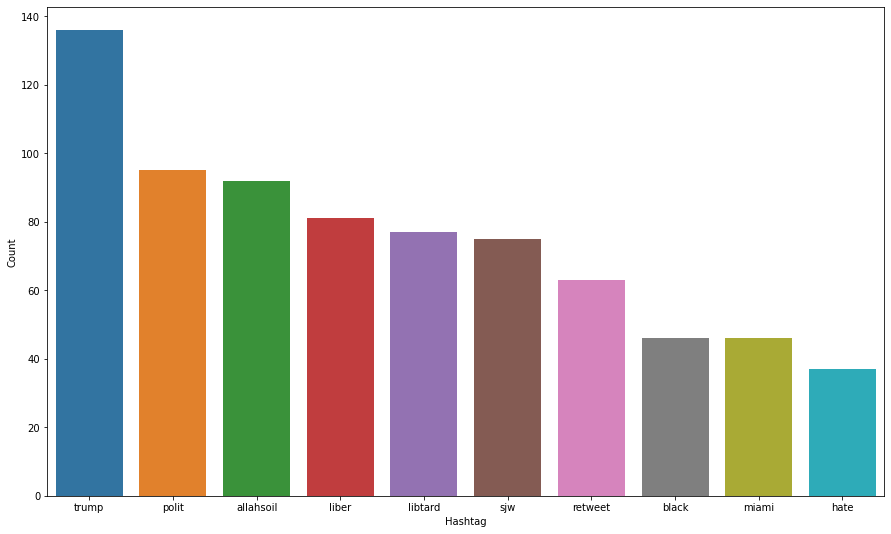

In [150]:
# select top 10 hashtags positive
d = d.nlargest(columns='Count', n=10)
plt.figure(figsize=(15,9))
sns.barplot(data=d, x='Hashtag', y='Count')
plt.show()

In [151]:
freq = nltk.FreqDist(ht_negative)
d = pd.DataFrame({'Hashtag': list(freq.keys()),
                  'Count': list(freq.values())})
d.head()

,Hashtag,Count
0,cnn,10
1,michigan,2
2,tcot,14
3,australia,6
4,opkillingbay,5


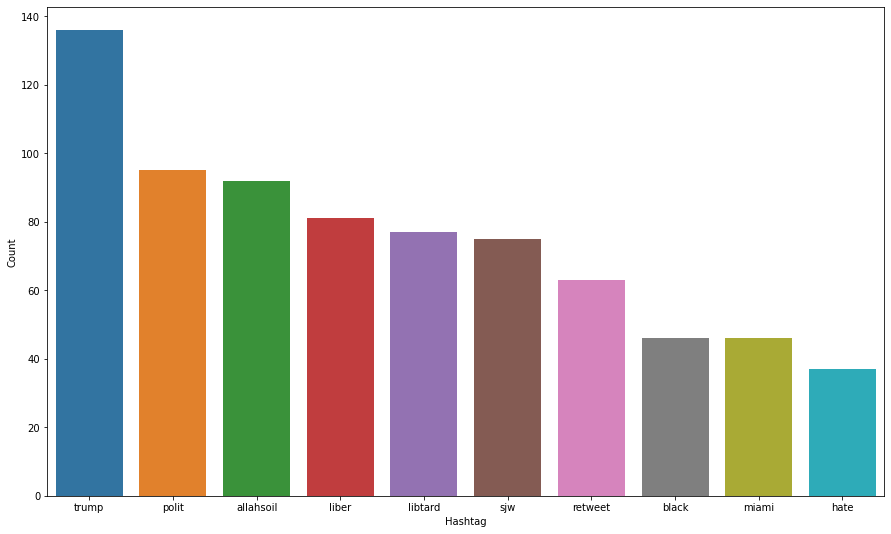

In [152]:
# select top 10 hashtags negative
d = d.nlargest(columns='Count', n=10)
plt.figure(figsize=(15,9))
sns.barplot(data=d, x='Hashtag', y='Count')
plt.show()

# Vectorizing data

In [155]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf=TfidfVectorizer(max_df=0.90, min_df=2,max_features=1000,stop_words='english')

tfidf_matrix=tfidf.fit_transform(data['clean_tweet'])

df_tfidf = pd.DataFrame(tfidf_matrix.todense())

df_tfidf

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49154,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49155,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49156,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49157,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Training Models

In [166]:
!pip install xgboost

In [172]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier

## Using features from TF-IDF for training set

In [156]:
train_tfidf_matrix = tfidf_matrix[:31962]

train_tfidf_matrix.todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [158]:
x_train_tfidf,x_valid_tfidf,y_train_tfidf,y_valid_tfidf = train_test_split(train_tfidf_matrix,data_train['label'],test_size=0.3,random_state=17)


## Logistique regression 

In [92]:
from sklearn.linear_model import LogisticRegression

In [93]:
Log_Reg = LogisticRegression(random_state=0,solver='lbfgs')

In [159]:
Log_Reg.fit(x_train_tfidf,y_train_tfidf)

LogisticRegression(random_state=0)

In [161]:
prediction_tfidf = Log_Reg.predict_proba(x_valid_tfidf)

prediction_tfidf

array([[0.98943602, 0.01056398],
       [0.97622337, 0.02377663],
       [0.95858283, 0.04141717],
       ...,
       [0.97635163, 0.02364837],
       [0.98742937, 0.01257063],
       [0.99059285, 0.00940715]])

In [162]:
prediction_int = prediction_tfidf[:,1]>=0.3

prediction_int = prediction_int.astype(np.int)
prediction_int

# calculating f1 score
log_tfidf = f1_score(y_valid_tfidf, prediction_int)

log_tfidf

0.59581589958159

## XGBoost

In [168]:
model_tfidf=XGBClassifier(random_state=29,learning_rate=0.7)

In [169]:
model_tfidf.fit(x_train_tfidf, y_train_tfidf)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.7, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=29,
              reg_alpha=0, reg_lambda=1, ...)

In [170]:
xgb_tfidf=model_tfidf.predict_proba(x_valid_tfidf)

xgb_tfidf

array([[0.9987781 , 0.00122188],
       [0.9881448 , 0.0118552 ],
       [0.9943998 , 0.0056002 ],
       ...,
       [0.9664953 , 0.03350472],
       [0.99800754, 0.00199248],
       [0.9983683 , 0.00163166]], dtype=float32)

In [171]:
xgb_tfidf=xgb_tfidf[:,1]>=0.3

# converting the results to integer type
xgb_int_tfidf=xgb_tfidf.astype(np.int)

# calculating f1 score
score=f1_score(y_valid_tfidf,xgb_int_tfidf)

score

0.593114241001565

## Decision Tree

In [173]:
dct = DecisionTreeClassifier(criterion='entropy', random_state=1)

In [174]:
dct.fit(x_train_tfidf,y_train_tfidf)

DecisionTreeClassifier(criterion='entropy', random_state=1)

In [197]:
dct_tfidf = dct.predict_proba(x_valid_tfidf)

dct_tfidf

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [198]:
# if prediction is greater than or equal to 0.3 than 1 else 0
# Where 0 is for positive sentiment tweets and 1 for negative sentiment tweets
dct_tfidf=dct_tfidf[:,1]>=0.3

# converting the results to integer type
dct_int_tfidf=dct_tfidf.astype(np.int)

# calculating f1 score
dct_score_tfidf=f1_score(y_valid_tfidf,dct_int_tfidf)

dct_score_tfidf

0.5647425897035881

# Model Comparison

In [199]:
Algo=['LogisticRegression(TF-IDF)','XGBoost(TF-IDF)','DecisionTree(TF-IDF)']


In [202]:
score = [log_tfidf,score,dct_score_tfidf]
compare= pd.DataFrame({'Model':Algo,'F1_Score':score},index=[i for i in range(1,4)])

In [204]:
compare.T

,1,2,3
Model,LogisticRegression(TF-IDF),XGBoost(TF-IDF),DecisionTree(TF-IDF)
F1_Score,0.595816,"[0.59581589958159, 0.593114241001565, 0.564742...",0.564743
